In [ ]:
import os
import pandas as pd
import seaborn as sns
import random
import matplotlib
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [ ]:
# Path to data files
p = "./data_processed/study1/"
p2 = "./data_processed/study2/"

In [ ]:
df = pd.read_csv(p+"/study1_tidy.csv")
df2 = pd.read_csv(p2+"/study2_tidy.csv")
print(df.shape)
print(df2.shape)

df.drop_duplicates(subset=['PID'], inplace=True)
df2.drop_duplicates(subset=['PID'], inplace=True)
print(df.shape)
print(df2.shape)

(915, 33)
(935, 33)
(305, 33)
(319, 33)


In [ ]:
df = df[df['exclude']==0]
df2 = df2[df2['exclude']==0]

print(df.shape)
print(df2.shape)

(288, 33)
(307, 33)


In [ ]:
df["recall_Recommend_article"].unique()

array(['Extremely', 'Moderately', 'A lot', 'A little', 'Not at All'],
      dtype=object)

In [ ]:
print('df1: ', df["recall_Recommend_article"].unique())
print('df2: ', df2["recall_Recommend_article"].unique())


df1:  ['Extremely' 'Moderately' 'A lot' 'A little' 'Not at All']
df2:  ['Moderately' 'A lot' 'Extremely' 'Not at All' 'A little']


In [ ]:
rateIntMap = {
    'Not at All':1,
    'A little': 2,
    'Moderately':3,
    'A lot': 4,
    'Extremely':5
}

In [ ]:
df.columns

Index(['recall_Recommend_article', 'recall_Content_surprise',
       'recall_view_opinion', 'PID', 'treatment', 'article', 'study',
       'topic_inv_drug_overdose_vlaue_opinion',
       'topic_inv_defend_view_point_drugOverdose',
       'topic_inv_learning_drug_overdose',
       'topic_inv_motivation_gaining_knowledge',
       'att_elic_drug_overdose_opinion_pre',
       'att_elic_combat_drug_priority_pre',
       'att_elic_opinion_on_drug_legalization_pre',
       'att_elic_drug_overdose_opinion_post',
       'att_elic_combat_drug_priority_post',
       'att_elic_opinion_on_drug_legalization_post', 'gender', 'race',
       'education', 'age', 'education-Comment', 'gender-Comment',
       'race-Comment', 'survey_start', 'study_finish', 'study_duration',
       'cogref_race', 'cogref_sheep', 'cogref_name', 'cogref_volume',
       'cogref_Superbowl', 'exclude'],
      dtype='object')

In [ ]:
columns = ['recall_Content_surprise']

In [ ]:
for col in columns:
  df[f"{col}_int"] = df[col].apply(lambda x: rateIntMap[x])
  df[f"{col}_int_noise"] =  df[f"{col}_int"].apply(lambda x: x + random.uniform(-.3,.3))

  df2[f"{col}_int"] = df2[col].apply(lambda x: rateIntMap[x])
  df2[f"{col}_int_noise"] =  df2[f"{col}_int"].apply(lambda x: x + random.uniform(-.3,.3))

In [ ]:
print(df['treatment'].unique())
print(df2['treatment'].unique())

order = ['control', 'txt', 'visual']

['visual' 'txt' 'control']
['control' 'txt' 'visual']


Study1

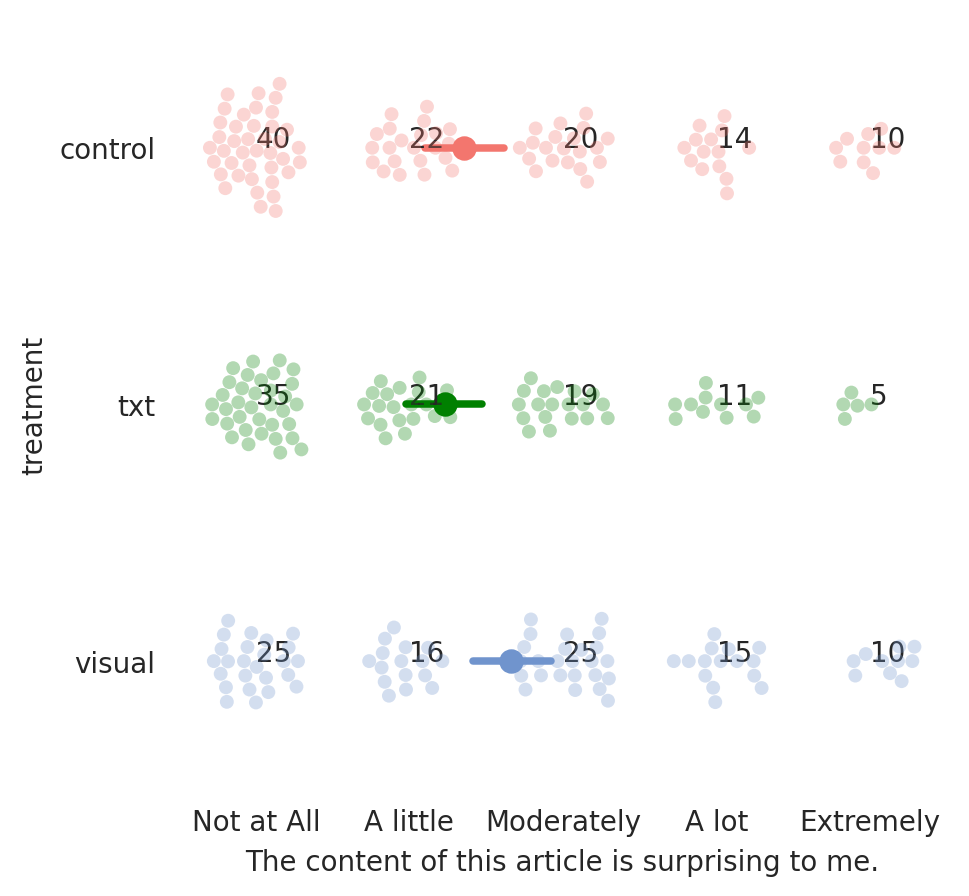

In [ ]:
from matplotlib.text import FontProperties
fig, ax = plt.subplots(figsize=(5,5), dpi=200)

for col in columns:
  g1= sns.pointplot(data=df, y="treatment", x=f"{col}_int", join=False, order=order, errorbar=('ci',95), hue='treatment', hue_order=order, palette=['#F3766E','green','#7094CD'])
  g1.legend_.remove()
  x_vals = df[f"{col}_int"].unique()
  x_vals.sort()
  for i in (x_vals):
    x_val = i
    for j,tr in enumerate(order):
      plt.text(x=i, y=j, s=f"{df[df['treatment'] == tr][f'{col}_int'].value_counts()[x_val]}")
  g = sns.swarmplot(
                    data=df,
                    x=f"{col}_int_noise",
                    y="treatment",
                    order=order,
                    alpha=0.3,
                    size= 5,
                    hue='treatment',
                    hue_order= order,
                    palette= ['#F3766E','green','#7094CD'],
                    legend=False)
  g.grid(False)
  g.set_xticks(range(1,6))
  g.set_xticklabels([k for k in list(rateIntMap.keys())])
  g.set_xlabel('The content of this article is surprising to me.')

  sns.despine(bottom = True, left = True)

  plt.savefig('./results_figures/recall_content_surprise/recall_content_surprise_study1.svg')
  plt.savefig('./results_figures/recall_content_surprise/recall_content_surprise_study1.jpg')
  plt.savefig('./results_figures/recall_content_surprise/recall_content_surprise_study1.pdf')



study2

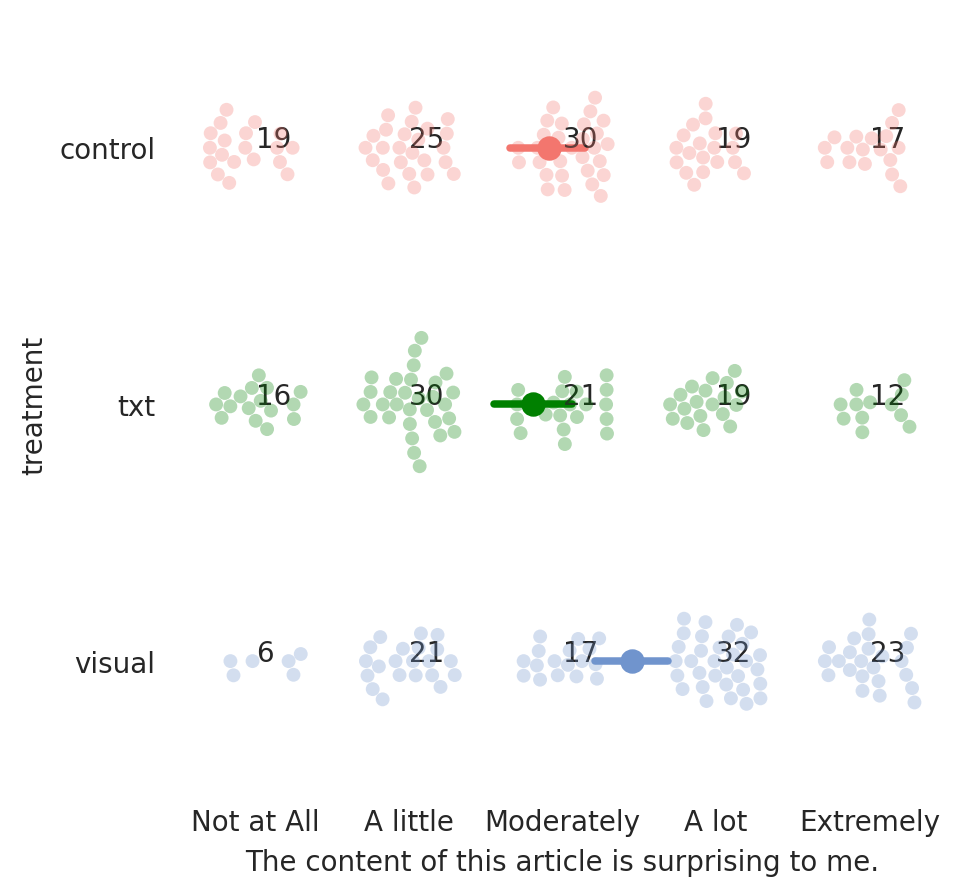

In [ ]:
fig, ax = plt.subplots(figsize=(5,5), dpi=200)
# fig, ax = plt.subplots(figsize=(5,5))

for col in columns:
  g2= sns.pointplot(ax=ax, data=df2, y="treatment", x=f"{col}_int",join=False,order=order, hue='treatment', hue_order=order, palette=['#F3766E','green','#7094CD'])
  g2.legend_.remove()
  x_vals = df2[f"{col}_int"].unique()
  x_vals.sort()
  for i in (x_vals):
    x_val = i
    for j,tr in enumerate(order):
      plt.text(x=i, y=j, s=f"{df2[df2['treatment'] == tr][f'{col}_int'].value_counts()[x_val]}")
  g = sns.swarmplot(ax=ax,
                    data=df2,
                    legend=False,
                    x=f"{col}_int_noise",
                    y="treatment",
                    size=5,
                    order= order,
                    hue_order = order,
                    alpha=0.3,
                    palette= ['#F3766E','green','#7094CD'],
                    hue='treatment')
  sns.despine(bottom = True, left = True)
  g.grid(False)
  g.set_xticks(range(1,6))
  g.set_xticklabels([k for k in list(rateIntMap.keys())])
  g.set_xlabel('The content of this article is surprising to me.')

  plt.savefig('./results_figures/recall_content_surprise/recall_content_surprise_study2.svg')
  plt.savefig('./results_figures/recall_content_surprise/recall_content_surprise_study2.jpg')
  plt.savefig('./results_figures/recall_content_surprise/recall_content_surprise_study2.pdf')



In [ ]:
df2[df2['treatment']=='txt']['recall_Content_surprise'].value_counts()

Moderately    79
A little      67
A lot         67
Not at All    46
Extremely     44
Name: recall_Content_surprise, dtype: int64

- Change x-axis labels to strings
- add count of responses
- Remove legend

In [ ]:
[k for k in list(rateIntMap.keys())]

['Not at All', 'A little', 'Moderately', 'A lot', 'Extremely']